# Loading Libraries

In [2]:
import pandas as pd
import joblib
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# loading health insurance data

In [35]:
data = pd.read_csv('/Users/osmanrahman/Documents/Github/Healthcareinsurance/insurance.csv')

In [37]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [79]:
print(data['sex'].value_counts())
print(data['region'].value_counts())
print(data['smoker'].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64


In [45]:
data.shape

(1338, 7)

In [47]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [49]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [55]:
# Preprocess the data
X = data.drop('charges', axis=1)
y = data['charges']

In [81]:
# Define categorical and numerical features
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

In [83]:
# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[('num', 'passthrough', numerical_features),
     ('cat', OneHotEncoder(), categorical_features)
       ])


In [85]:
# Create a model pipeline
model = Pipeline(steps=[
       ('preprocessor', preprocessor),
       ('regressor', RandomForestRegressor())
   ])

In [89]:
# Train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'bmi', 'children']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', RandomForestRegressor())])

In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 21060580.88393265
Mean Absolute Error (MAE): 2491.2521307015245
R² Score: 0.8643429760645185


In [95]:
# R² Score (Coefficient of Determination)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

R² Score: 0.8643429760645185


In [97]:
# Cross-Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, scoring='r2', cv=5)  # 5-fold cross-validation
print(f"Cross-Validation R² Scores: {scores}")
print(f"Mean R² Score: {scores.mean()}")


Cross-Validation R² Scores: [0.85428279 0.77518331 0.86971367 0.83232023 0.85465292]
Mean R² Score: 0.8372305847616959


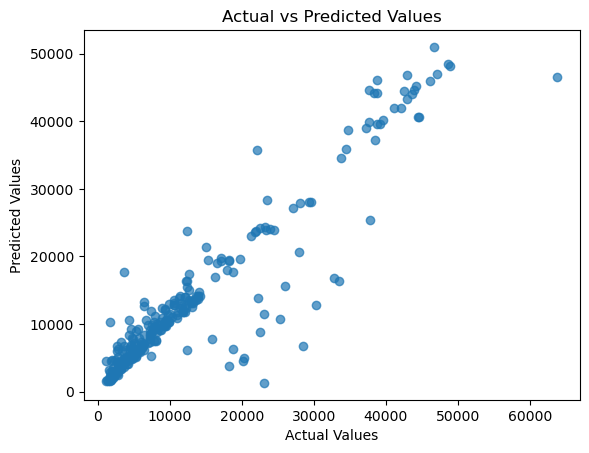

In [99]:
# Visualize Predictions vs. Actual Values
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


In [91]:
# Save the model
joblib.dump(model, '/Users/osmanrahman/Documents/Github/Healthcareinsurance/insurance_model.pkl')

['/Users/osmanrahman/Documents/Github/Healthcareinsurance//insurance_model.pkl']